<font size='5'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (1)\data.csv")

In [3]:
df.head(10)

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611Jeffreychester, MN 672...",FloralWhite,12.03,34.48,5.49,637.10
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692Josephbury, WV 922...",DarkSlateBlue,11.37,36.68,4.69,521.57
7,awatkins@yahoo.com,Unit 6538 Box 8980DPO AP 09026-4941,Aqua,12.35,37.37,4.43,549.90
8,vchurch@walter-martinez.com,"860 Lee KeyWest Debra, SD 97450-0495",Salmon,13.39,37.53,3.27,570.20
9,bonnie69@lin.biz,"PSC 2734, Box 5255APO AA 98456-7482",Brown,11.81,37.15,3.20,427.20


In [4]:
df.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [6]:
df.isnull().sum()

\tEmail                 0
Address                 0
Avatar                  0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

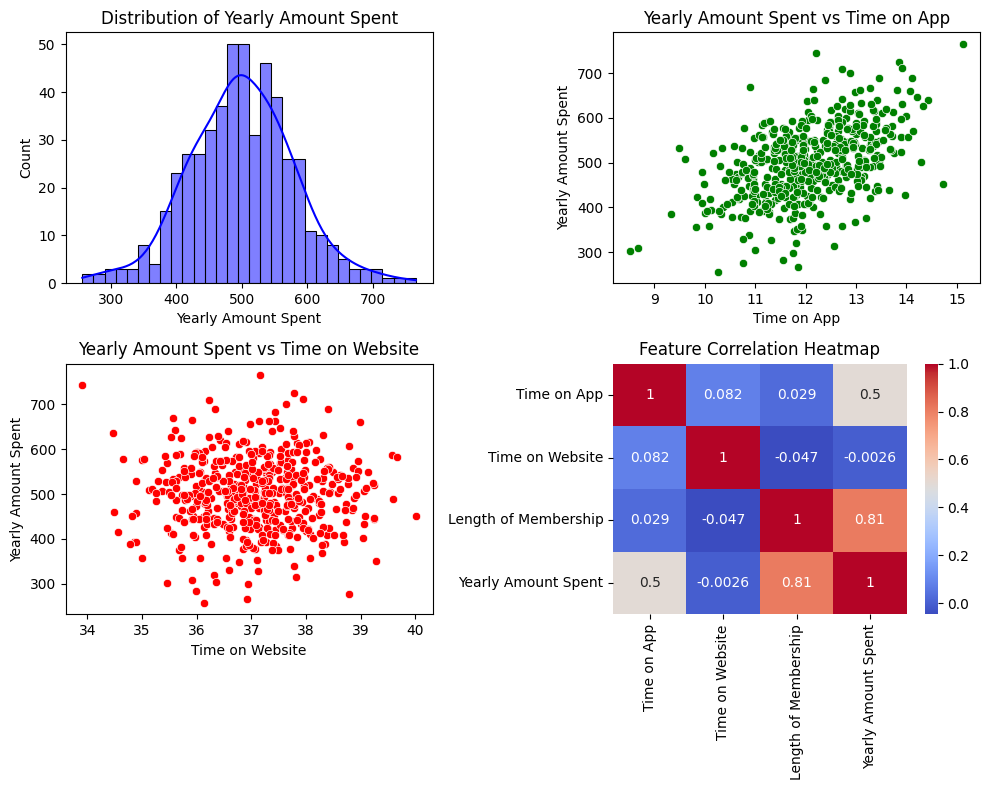

In [7]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Histogram of Yearly Amount Spent
sns.histplot(df["Yearly Amount Spent"], bins=30, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of Yearly Amount Spent")

# Scatter plot: Yearly Amount Spent vs Time on App
sns.scatterplot(x=df["Time on App"], y=df["Yearly Amount Spent"], ax=axes[0, 1], color="green")
axes[0, 1].set_title("Yearly Amount Spent vs Time on App")

# Scatter plot: Yearly Amount Spent vs Time on Website
sns.scatterplot(x=df["Time on Website"], y=df["Yearly Amount Spent"], ax=axes[1, 0], color="red")
axes[1, 0].set_title("Yearly Amount Spent vs Time on Website")

# Heatmap of correlations
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Feature Correlation Heatmap")

# Show plots
plt.tight_layout()
plt.show()

In [8]:
x = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

<font size='5'>*Train_test_split*</font>

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)
print(y_train.shape)

(400, 3)
(400,)


In [11]:
print(X_test.shape)
print(y_test.shape)

(100, 3)
(100,)


<font size='5'>*StandardScaler*</font>

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
import xgboost as xgb 
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV 

<font size='5'>*LinearRegression*</font>

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_train = lr.score(X_train, y_train)
lr_test = lr.score(X_test, y_test)
lr_rmse = mean_squared_error(y_test, lr_pred)**(1/2)

In [15]:
print(f"Accuracy score for LinearRegression on the train set: {lr_train}")
print(f"Accuracy score for LinearRegression on the test set: {lr_test}")
print(f"RMSE score for LinearRegression on the test set: {lr_rmse}")

Accuracy score for LinearRegression on the train set: 0.8887177140197993
Accuracy score for LinearRegression on the test set: 0.7877712220468758
RMSE score for LinearRegression on the test set: 32.417705838358444


<font size='5'>*DecisionTreeRegressor*</font>

In [16]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42, min_samples_leaf=5, min_samples_split=5)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_train = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)
dt_rmse = mean_squared_error(y_test, dt_pred)**(1/2)

In [17]:
print(f"Accuracy score for DecisionTreeRegressor on the train set: {dt_train}")
print(f"Accuracy score for DecisionTreeRegressor on the test set: {dt_test}")
print(f"RMSE score for DecisionTreeRegressor on the test set: {dt_rmse}")

Accuracy score for DecisionTreeRegressor on the train set: 0.8778655575787218
Accuracy score for DecisionTreeRegressor on the test set: 0.6986390161500746
RMSE score for DecisionTreeRegressor on the test set: 38.62990614215063


<font size='5'>*RandomForestRegressor*</font>

In [18]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42, min_samples_leaf=5, min_samples_split=5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_train = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)
rf_rmse = mean_squared_error(y_test, rf_pred)**(1/2)

In [19]:
print(f"Accuracy score for RandomForestRegressor on the train set: {rf_train}")
print(f"Accuracy score for RandomForestRegressor on the test set: {rf_test}")
print(f"RMSE score for RandomForestRegressor on the test set: {rf_rmse}")

Accuracy score for RandomForestRegressor on the train set: 0.9062992684996009
Accuracy score for RandomForestRegressor on the test set: 0.7592998449430519
RMSE score for RandomForestRegressor on the test set: 34.52377880912835


<font size='5'>*GridSearchCV with RandomForesetRegressor*</font>

In [20]:
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20, 25]}, cv=5)
rf_grid.fit(X_train, y_train)
rf_grid_pred = rf_grid.predict(X_test)
rf_grid_train = rf_grid.score(X_train, y_train)
rf_grid_test = rf_grid.score(X_test, y_test)
rf_grid_rmse = mean_squared_error(y_test, rf_grid_pred)**(1/2)

In [21]:
print(f"Accuracy score for GridSearchCV with RandomForestRegressor on the train set: {rf_grid_train}")
print(f"Accuracy score for GridSearchCV with RandomForestRegressor on the test set: {rf_grid_test}")
print(f"RMSE score for GridSearchCV with RandomForestRegressor on the test set: {rf_grid_rmse}")

Accuracy score for GridSearchCV with RandomForestRegressor on the train set: 0.9776845745978133
Accuracy score for GridSearchCV with RandomForestRegressor on the test set: 0.7660960169292621
RMSE score for GridSearchCV with RandomForestRegressor on the test set: 34.032899331721


<font size='5'>*XGBRegressor*</font>

In [22]:
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_train = xgb_model.score(X_train, y_train)
xgb_test = xgb_model.score(X_test, y_test)
xgb_rmse = mean_squared_error(y_test, xgb_pred)**(1/2)

In [23]:
print(f"Accuracy score for XGBRegressor on the train set: {xgb_train}")
print(f"Accuracy score for XGBRegressor on the test set: {xgb_test}")
print(f"RMSE score for XGBRegressor on the test set: {xgb_rmse}")

Accuracy score for XGBRegressor on the train set: 0.9986564337287411
Accuracy score for XGBRegressor on the test set: 0.6950247463129673
RMSE score for XGBRegressor on the test set: 38.86086301076711


<font size='5'>*GridSearchCV with XGBRegressor*</font>

In [24]:
xgb_grid = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20, 25]}, cv=5)
xgb_grid.fit(X_train, y_train)
xgb_grid_pred = xgb_grid.predict(X_test)
xgb_grid_train = xgb_grid.score(X_train, y_train)
xgb_grid_test = xgb_grid.score(X_test, y_test)
xgb_grid_rmse = mean_squared_error(y_test, xgb_grid_pred)**(1/2)

In [25]:
print(f"Accuracy score for GridSearchCV with XGBRegressor on the train set: {xgb_grid_train}")
print(f"Accuracy score for GridSearchCV with XGBRegressor on the test set: {xgb_grid_test}")
print(f"RMSE score for GridSearchCV with XGBRegressor on the test set: {xgb_grid_rmse}")

Accuracy score for GridSearchCV with XGBRegressor on the train set: 0.9999999973979813
Accuracy score for GridSearchCV with XGBRegressor on the test set: 0.6796526174290054
RMSE score for GridSearchCV with XGBRegressor on the test set: 39.82820468495724
